
**IDs**: 305674731

**Date**:25/11/24

##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, Chi-Squared, t, and F distributions

#### Due: 25/11/2024 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preffered) or submit additional notes.

## Problem 1 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality).
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outliers, namely data points exceeding 1.5 the IQR (above or below). Mark and remove those.  
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable.
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.


In [1]:
# Your code here

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from sklearn.linear_model import LinearRegression

In [2]:
# Q.1.
# Load and inspect the dataset
dataset = pd.read_csv('./winequality-red.csv', sep=";")
print("Dataset Shape:", dataset.shape)

Dataset Shape: (1599, 12)


#### I assume there are red wines with the same values, so I won't use the drop_duplicates() function.

In [3]:
# View dataset info, including number of rows, data types, and non-null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Check for remaining null values
print(f"Check for remaining null values:\n{dataset.isnull().sum()}")

Check for remaining null values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Q.2.
# Filter columns
filtered_dataset = dataset[['density', 'alcohol', 'pH', 'volatile acidity', 'quality']]
# Print head
print(filtered_dataset.head())

   density  alcohol    pH  volatile acidity  quality
0   0.9978      9.4  3.51              0.70        5
1   0.9968      9.8  3.20              0.88        5
2   0.9970      9.8  3.26              0.76        5
3   0.9980      9.8  3.16              0.28        6
4   0.9978      9.4  3.51              0.70        5


In [6]:
# Q.3.
# Calculate descriptive statistics
statistics = filtered_dataset.describe(percentiles=[0.25, 0.5, 0.75]).T

# Add variance, IQR, and absolute range to the statistics
statistics['variance'] = filtered_dataset.var()
statistics['IQR'] = statistics['75%'] - statistics['25%']
statistics['absolute_range'] = statistics['max'] - statistics['min']

# Rename columns for clarity
statistics.rename(columns={'50%': 'median', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

statistics = statistics.T

# Print rounded statistics
print(statistics.round(2))

                density  alcohol       pH  volatile acidity  quality
count           1599.00  1599.00  1599.00           1599.00  1599.00
mean               1.00    10.42     3.31              0.53     5.64
std                0.00     1.07     0.15              0.18     0.81
min                0.99     8.40     2.74              0.12     3.00
Q1                 1.00     9.50     3.21              0.39     5.00
median             1.00    10.20     3.31              0.52     6.00
Q3                 1.00    11.10     3.40              0.64     6.00
max                1.00    14.90     4.01              1.58     8.00
variance           0.00     1.14     0.02              0.03     0.65
IQR                0.00     1.60     0.19              0.25     1.00
absolute_range     0.01     6.50     1.27              1.46     5.00


In [7]:
# Q.4.
# Outlier detection and removal
IQR = statistics.loc['IQR']
lower_bound = filtered_dataset.quantile(0.25) - 1.5 * IQR
upper_bound = filtered_dataset.quantile(0.75) + 1.5 * IQR
outliers = ((filtered_dataset < lower_bound) | (filtered_dataset > upper_bound)).any(axis=1)
cleaned_dataset = filtered_dataset[~outliers]
num_outliers = outliers.sum()
total_points = len(filtered_dataset)

print(f"Number of outliers removed: {num_outliers} ({(num_outliers/total_points)*100:.2f}%)")
print(f"Original dataset shape: {filtered_dataset.shape}")
print(f"Dataset shape after removing outliers: {cleaned_dataset.shape}")

Number of outliers removed: 113 (7.07%)
Original dataset shape: (1599, 5)
Dataset shape after removing outliers: (1486, 5)


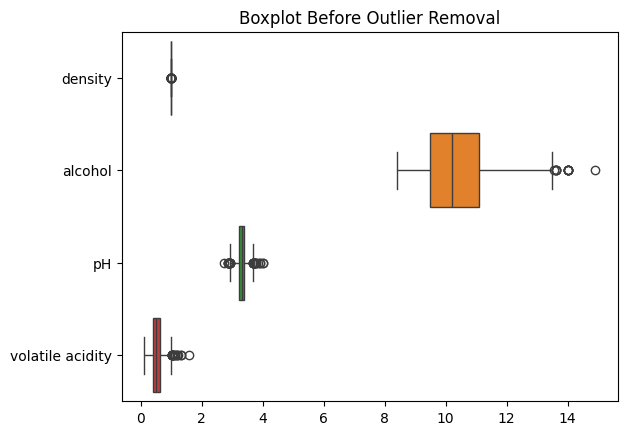

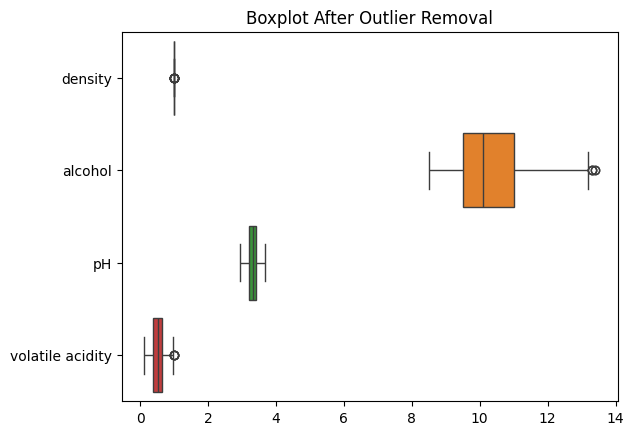

In [8]:
# Before outlier removal
sns.boxplot(data=filtered_dataset.drop(columns='quality'), orient='h')
plt.title('Boxplot Before Outlier Removal')
plt.show()

# After outlier removal
sns.boxplot(data=cleaned_dataset.drop(columns='quality'), orient='h')
plt.title('Boxplot After Outlier Removal')
plt.show()


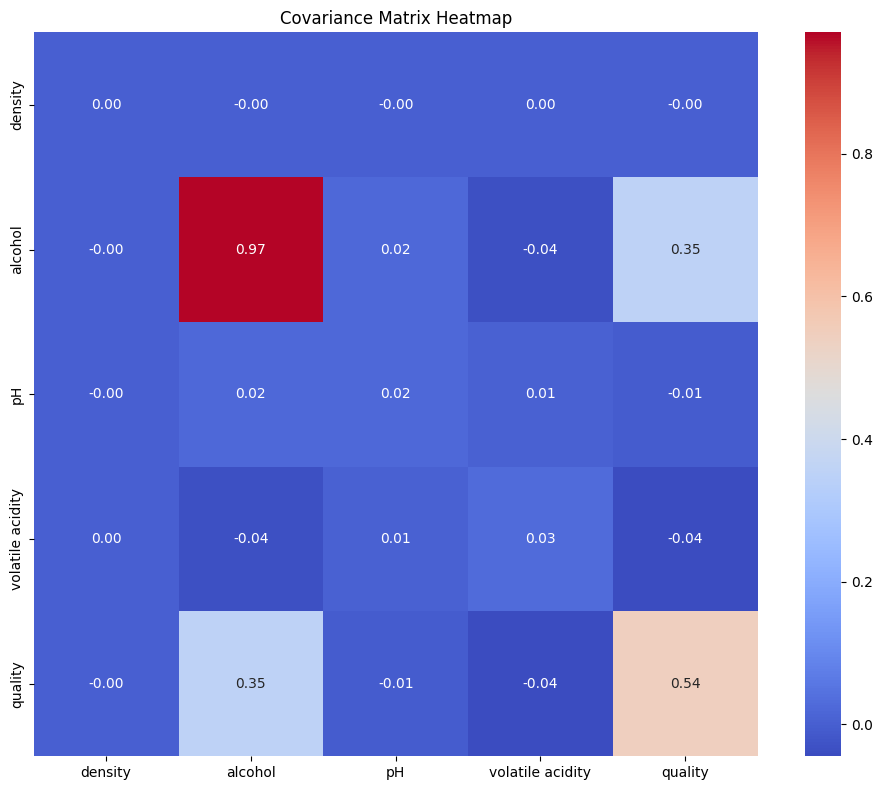

In [9]:
# Q.5.
# Covariance Matrix
covariance_matrix = cleaned_dataset.cov()
correlation_matrix = cleaned_dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()

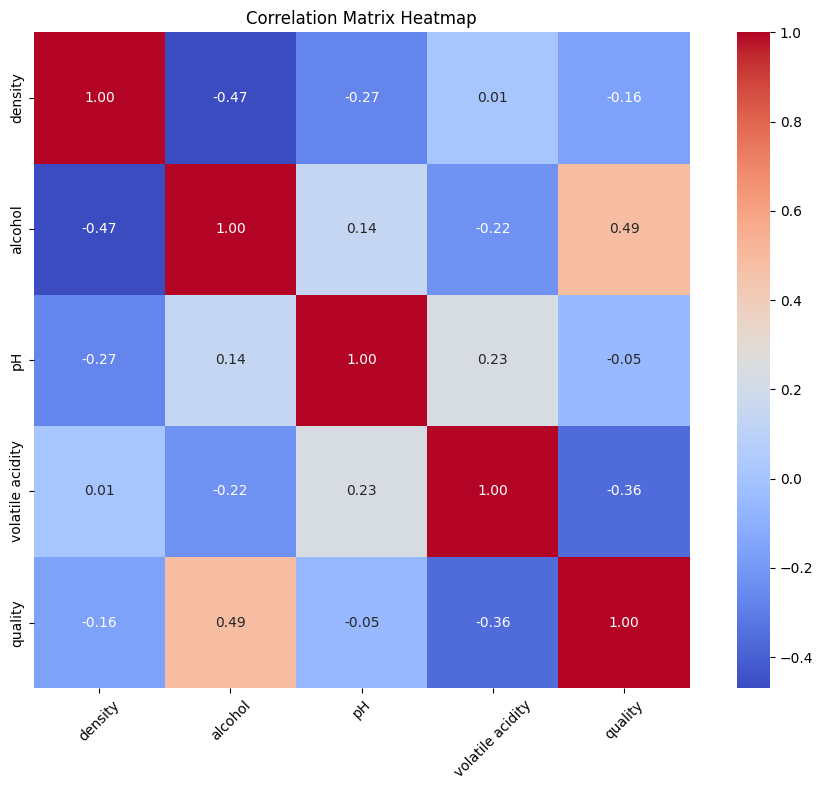

In [10]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [11]:
target_variable = 'quality'
correlations_with_target = correlation_matrix[target_variable].drop(target_variable).sort_values()

# Separate into positive and negative correlations
positive_correlations = correlations_with_target[correlations_with_target > 0]
negative_correlations = correlations_with_target[correlations_with_target < 0]

print(f"Variables positively correlated with '{target_variable}':\n{positive_correlations.sort_values(ascending=False)}\n")
print(f"Variables negatively correlated with '{target_variable}':\n{negative_correlations.sort_values()}\n")

Variables positively correlated with 'quality':
alcohol    0.488484
Name: quality, dtype: float64

Variables negatively correlated with 'quality':
volatile acidity   -0.364143
density            -0.162986
pH                 -0.051746
Name: quality, dtype: float64



In [12]:
most_positive = correlations_with_target[correlations_with_target > 0].idxmax(), correlations_with_target.max()
most_negative = correlations_with_target[correlations_with_target < 0].idxmin(), correlations_with_target.min()

# Print the results
print(f"The most positively correlated variable with '{target_variable}': {most_positive[0]} ({most_positive[1]:.2f})")
print(f"The most negatively correlated variable with '{target_variable}': {most_negative[0]} ({most_negative[1]:.2f})")

The most positively correlated variable with 'quality': alcohol (0.49)
The most negatively correlated variable with 'quality': volatile acidity (-0.36)


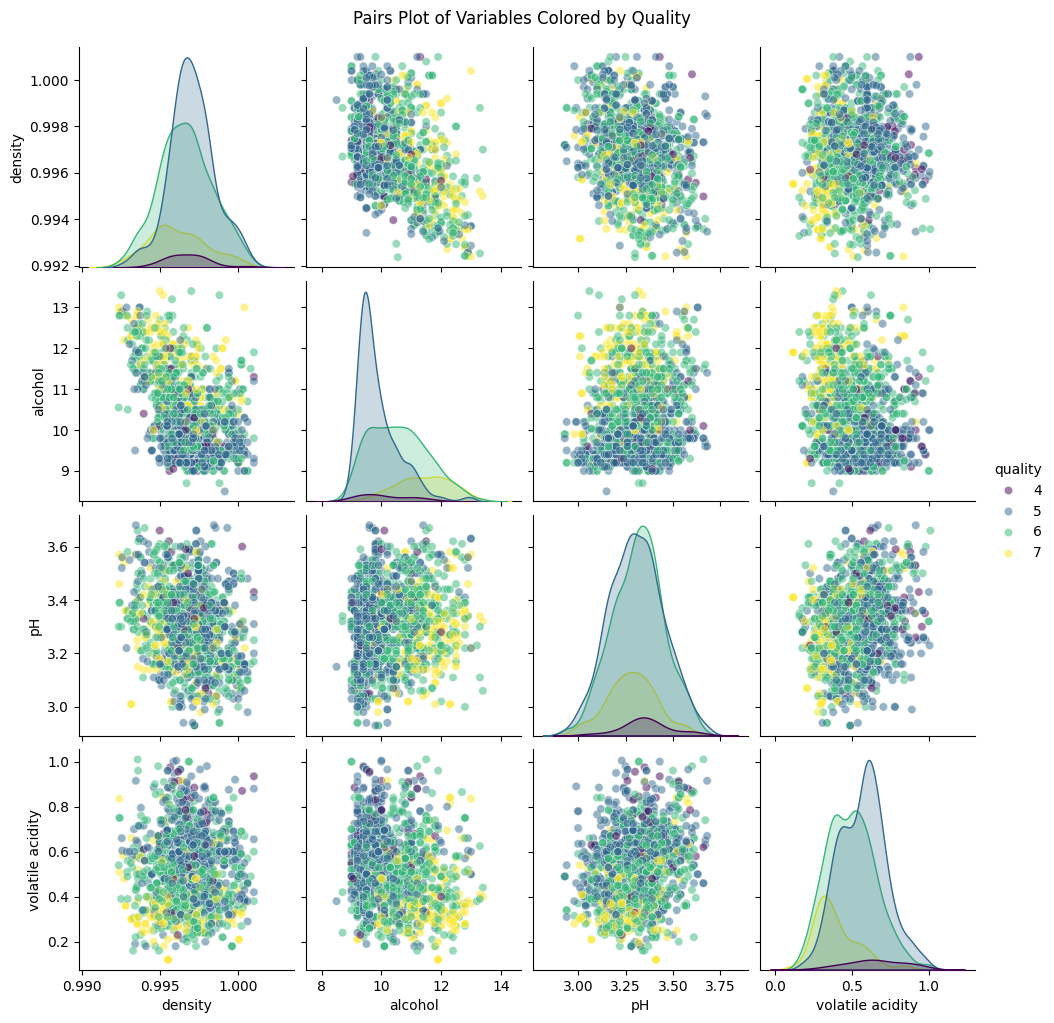

In [13]:
# Q.6.
# PairGrid for scatterplots
sns.pairplot(cleaned_dataset, diag_kind="kde", hue='quality', palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Pairs Plot of Variables Colored by Quality', y=1.02)
plt.show()

#### Note: The target variable 'quality' is shown in the pairplot as a hue, which colors the scatterplots based on the categories or values of quality.

<hr>
<hr>

## Problem 2 (Making a Model)
A social media corporation is experiencing a decline in user engagement over the last few months. One of their team wants to measure the effect of introducing a new feature on the time users interact with their app. The model they want to use has the daily time users spending using their app declining linearly over time, for day $t=0,1,\ldots$. At time $t=40$, they launch the campaign but only for users with a certain test group. They think this could change the slope at time $t=40$ for users within this group (it changes the *slope*, hence would not put a jump discontinuity into the engagement level).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model).

*The point*: as data scientist/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$-s and $y$-s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove.

<hr>
<hr>

Step 1: Formulating the Mathematical Model
First, let's identify what we need in our model:

- A linear decline over time (base trend)
A potential change in slope at t=40 (lunched the new campaign)
Continuous function (no jumps as written above)
Error term for randomness


#### lets write our mathematical model:

\begin{align*}
Y_t &= \beta_0 + \beta_1t + \beta_2(t - 40)^+ + \varepsilon_t \\[2ex]
\text{Where:} \\[1ex]
& Y_t \text{ is the engagement time on day } t \\[1ex]
& \beta_0 \text{ is the initial level of user engagement (intercept)} \\[1ex]
& \beta_1 \text{ is the initial slope (before intervention)} \\[1ex]
& \beta_2 \text{ is the change in slope after intervention} \\[1ex]
& (t - 40)^+ = \max\{0,t-40\}: \text{ (also called "hockey stick function")} \\
& \qquad \begin{cases}
0 & \text{when } t < 40 \\
(t - 40) & \text{when } t \geq 40
\end{cases} \\[2ex]
& \varepsilon_t \text{ is the random error term}
\end{align*}


#### Let's visualize this with code:


\begin{align*}
\text{Assumptions:} \\[1ex]
& \bullet \text{ Total days in test: } T = 80 \text{ days} \\[1ex]
& \bullet \text{ Initial engagement level: } \beta_0 = 100 \text{ minutes} \\[1ex]
& \bullet \text{ Initial slope: } \beta_1 = -0.5 \text{ minutes/day} \\[1ex]
& \bullet \text{ Change in slope after intervention: } \beta_2 = 0.3 \text{ minutes/day}
\end{align*}

We will generate some random noise to the data to make it more realistic.
In our model the Z features are:
* Z₁ = t (Time Feature) - Basic time counter from 0 to n_days
* Z₂ = (t-40)⁺ (Hockey Stick Feature) - The "intervention effect" feature

Model with intervention effect (β₂ ≠ 0):


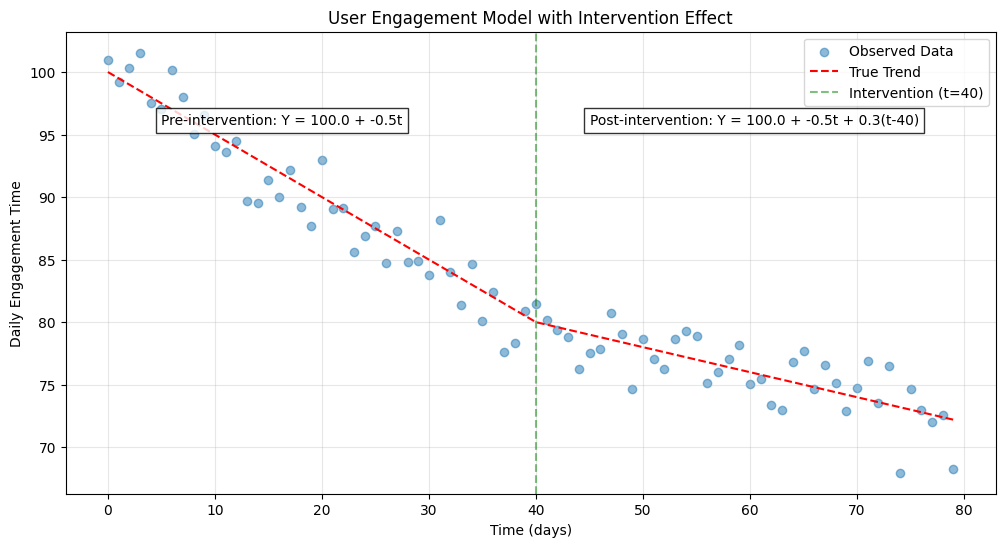


Model without intervention effect (β₂ = 0):


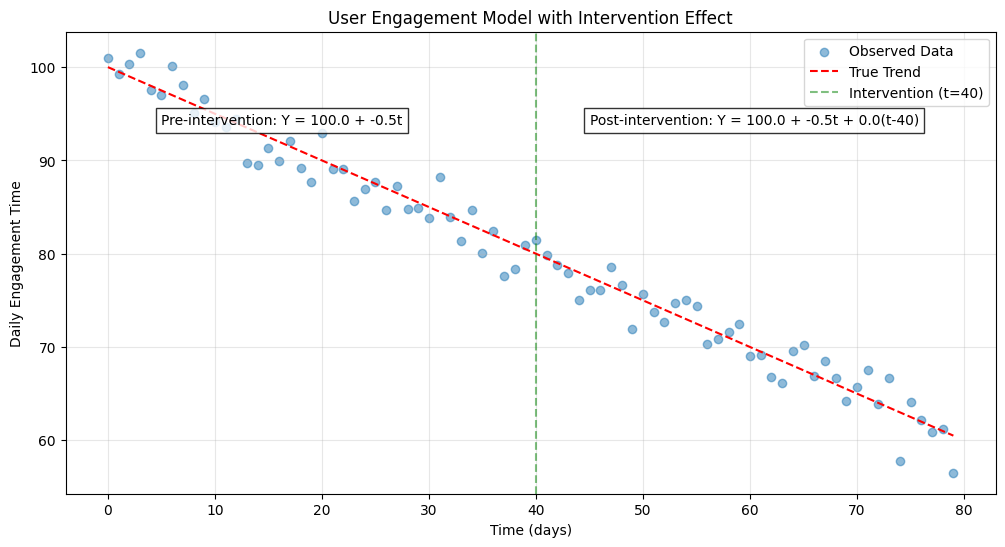

In [14]:
def create_model_visualization(beta0=100, beta1=-0.5, beta2=0.3, n_days=80):
    # Generate time points
    t = np.arange(n_days)

    # Create hockey stick function
    b2_func = np.maximum(0, t - 40)

    # Generate true trend (without noise)
    y_trend = beta0 + beta1 * t + beta2 * b2_func

    # Add some random noise for more real feel
    np.random.seed(42)
    y_with_noise = y_trend + np.random.normal(0, 2, n_days)

    # Create DataFrame
    df = pd.DataFrame({
        'Day': t,
        'Trend': y_trend,
        'Engagement': y_with_noise #this is simulate the observe data
    })

    # Create visualization
    plt.figure(figsize=(12, 6))

    # Plot actual points
    plt.scatter(df['Day'], df['Engagement'], alpha=0.5, label='Observed Data')

    # Plot trend line
    plt.plot(df['Day'], df['Trend'], 'r--', label='True Trend')

    # Add vertical line at intervention
    plt.axvline(x=40, color='green', linestyle='--', alpha=0.5, label='Intervention (t=40)')

    # Annotations
    plt.title('User Engagement Model with Intervention Effect')
    plt.xlabel('Time (days)')
    plt.ylabel('Daily Engagement Time')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Show equations
    text_y = plt.ylim()[0] + 0.8 * (plt.ylim()[1] - plt.ylim()[0])
    plt.text(5, text_y, f'Pre-intervention: Y = {beta0:.1f} + {beta1:.1f}t',
             bbox=dict(facecolor='white', alpha=0.8))
    plt.text(45, text_y, f'Post-intervention: Y = {beta0:.1f} + {beta1:.1f}t + {beta2:.1f}(t-40)',
             bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

# Show model with and without intervention effect
print("Model with intervention effect (β₂ ≠ 0):") #trend affect the user engagement - The negative trend becomes less steep after intervention
create_model_visualization(beta2=0.3)

print("\nModel without intervention effect (β₂ = 0):") #No change at the intervention point trend doesnt affect so b2 = 0
create_model_visualization(beta2=0)

Business Interpretation of β₂:
When β₂ = 0.3:

- Decline rate slowed down
- Engagement still decreases but slower
- Intervention shows partial success

When β₂ = 0:

- No impact from intervention
- Decline rate unchanged
- Intervention was ineffective

The key insight is that β₂ measures intervention effectiveness - a positive value indicates improved engagement trend, while zero indicates no effect.

---------------

## Problem 3 (Linearization trick in Sinusoidal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \cos\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response variable $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?

2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response variable $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?

3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are functions of $(\beta_0, \beta_1, \beta_2)$. Find these functions.

<hr>
<hr>


### Answers:

### Question 1:

The model is given as:

$$
\mathbb{E}[Y|X=x] = \beta_0 + \beta_1\, \cos\left(2\pi (x - \beta_2)\right)
$$

This model is **nonlinear** in the parameters $\beta_1$ and $\beta_2$:

- The parameter $\beta_2$ appears inside the cosine function, which is a nonlinear transformation.
- Although $\beta_1$ multiplies the cosine term, the cosine function depends on $\beta_2$, making the entire term nonlinear in parameters.

**Note:** Linearity refers to the model being linear in its parameters. Here, the parameters are involved in a nonlinear way due to the cosine function.

---

### Question 2:

The model is given as:

$$
\mathbb{E}[Y|X=x] = \beta_0' + \beta_1'\, \sin\left(2\pi x\right) + \beta_2'\, \cos\left(2\pi x\right)
$$

This model is **linear** in the parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$:

- The expected value $\mathbb{E}[Y|X=x]$ is expressed as a linear combination of the parameters.
- The functions $\sin(2\pi x)$ and $\cos(2\pi x)$ depend only on the predictor $x$ and are known for each $x$.

---

### Question 3:

We can rewrite the model from Question 1 in the form of the model in Question 2.

**Step 1:** Start with the original model:

$$
\mathbb{E}[Y|X=x] = \beta_0 + \beta_1\, \cos\left(2\pi (x - \beta_2)\right)
$$

**Step 2:** Apply the trigonometric identity:

$$
\cos(a - b) = \cos a \cos b + \sin a \sin b
$$

Using this identity:

$$
\cos\left(2\pi x - 2\pi \beta_2\right) = \cos(2\pi x) \cos(2\pi \beta_2) + \sin(2\pi x) \sin(2\pi \beta_2)
$$

**Step 3:** Substitute back into the model:

$$
\begin{align*}
\mathbb{E}[Y|X=x] &= \beta_0 + \beta_1 \left[ \cos(2\pi x)\, \cos(2\pi \beta_2) + \sin(2\pi x)\, \sin(2\pi \beta_2) \right] \\
&= \beta_0 + \left( \beta_1\, \cos(2\pi \beta_2) \right) \cos(2\pi x) + \left( \beta_1\, \sin(2\pi \beta_2) \right) \sin(2\pi x)
\end{align*}
$$

**Step 4:** Rearrange to match the form of Model 2:

$$
\mathbb{E}[Y|X=x] = \beta_0' + \beta_1'\, \sin(2\pi x) + \beta_2'\, \cos(2\pi x)
$$

where:

$$
\beta_0' = \beta_0 \\,
\beta_1' = \beta_1\, \sin(2\pi \beta_2) \\,
\beta_2' = \beta_1\, \cos(2\pi \beta_2)
$$

**Note:** This shows that the parameters $(\beta_0', \beta_1', \beta_2')$ are functions of $(\beta_0, \beta_1, \beta_2)$.

**Additional Suggestion:** The transformation is invertible (except when $\beta_1 = 0$), allowing us to recover the original parameters:

- Recover $\beta_1$:

  $$
  \beta_1 = \sqrt{ (\beta_1')^2 + (\beta_2')^2 }
  $$

- Recover $\beta_2$:

  $$
  \beta_2 = \frac{1}{2\pi} \arctan\left( \frac{\beta_1'}{\beta_2'} \right)
  $$

- Recover $\beta_0$:

  $$
  \beta_0 = \beta_0'
  $$

This means we can estimate the parameters of the original nonlinear model using linear regression techniques applied to the transformed model.

---

### Final Answer:

1. Model (1) is **nonlinear** in parameters.

2. Model (2) is **linear** in parameters.

3. **The parameters in Model (2) are related to those in Model (1) by:**

   $$
   \beta_0' = \beta_0, \quad \beta_1' = \beta_1\, \sin(2\pi \beta_2), \quad \beta_2' = \beta_1\, \cos(2\pi \beta_2)
   $$

   **Note:** This transformation allows us to rewrite the nonlinear model as a linear one, facilitating parameter estimation through linear regression.

--------------------

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor.
3. Plot the response values $y$ and the fitted response $\hat{y} = Z \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies  (using e.g. ``numpy.isclose``):
 - $H = H^\top$
 - $H^2 = H$
 - $\hat{\epsilon}^\top \hat{y} = 0$
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{total} = SS_{fit} + SS_{residual}$, for the sum of squares decomposition

<hr>
<hr>

In [15]:
# Read the CSV file
wine_quality = pd.read_csv('./winequality-red.csv', sep=";")

# Separate features and target
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
X = wine_quality[features]
y = wine_quality['quality']

# Display basic information
print("\nDataset Shape:", wine_quality.shape)
print("\nFeatures:")
print(X.head())


Dataset Shape: (1599, 12)

Features:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.

Now our data is clean without duplications ,Null values and ready for work.

# ex4.1 -  find vector of regression coefficients  𝛽̂.

In [16]:
# 2. Normal Equation Implementation
#add bias term on '1' to the data
Z = np.column_stack((np.ones_like(y), X))

# Calculate β̂
beta_hat = np.linalg.pinv(Z) @ y

# Create DataFrame with results
predictors = np.insert(X.columns.values, 0, 'bias')
coefficients_map = pd.DataFrame(beta_hat, index=predictors, columns=["coefficient"])

# Print coefficients
print("\nRegression Coefficients (β̂):")
print(coefficients_map.round(4))



Regression Coefficients (β̂):
                      coefficient
bias                      21.9652
fixed acidity              0.0250
volatile acidity          -1.0836
citric acid               -0.1826
residual sugar             0.0163
chlorides                 -1.8742
free sulfur dioxide        0.0044
total sulfur dioxide      -0.0033
density                  -17.8812
pH                        -0.4137
sulphates                  0.9163
alcohol                    0.2762


### Ex4.2
Now we will plot the y vs y_hat in this form: Each purple dot represents one wine sample For each dot: The x-coordinate is the actual wine quality (y) The y-coordinate is what our model predicted (ŷ) The blue dashed line represents perfect predictions where y = ŷ.
How to interpret it:
1. If a dot is on the blue line → perfect prediction.
2. If a dot is above the line → model overestimated the quality.
3. If a dot is below the line → model underestimated the quality.
4. The closer the dots are to the blue line, the better your model's predictions

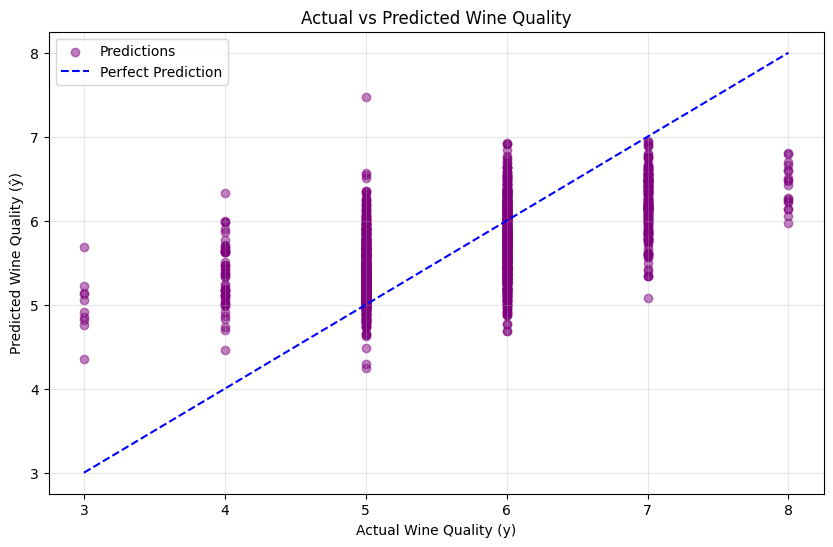

In [17]:
# Calculate predicted values (ŷ = Zβ̂)
y_hat = Z @ beta_hat

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_hat, color='purple', alpha=0.5, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', label='Perfect Prediction')
plt.xlabel('Actual Wine Quality (y)')
plt.ylabel('Predicted Wine Quality (ŷ)')
plt.title('Actual vs Predicted Wine Quality')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Ex4.3 - histogram of the residual vector 𝜖̂
Now lets Illustrate the histogram of the residual vector 𝜖̂ and plot the mean of the residual as well


Residuals Statistics:
Mean: 0.000000
Standard Deviation: 0.645575


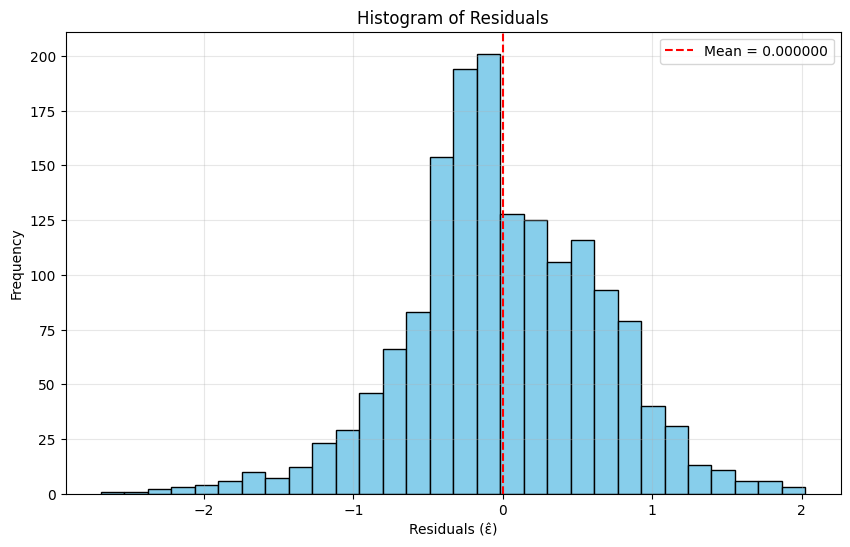

In [18]:
# Calculate residuals (ε̂ = y - ŷ)
residuals = y - y_hat

# Calculate mean of residuals
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
print("\nResiduals Statistics:")
print(f"Mean: {residuals_mean:.6f}")
print(f"Standard Deviation: {residuals_std:.6f}")

# Create histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=residuals_mean, color='red', linestyle='--', label=f'Mean = {residuals_mean:.6f}')
plt.xlabel('Residuals (ε̂)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

* The avarege of this vector is 0 this is one of the properties of using least squere error. It means our model is not systematically over-predicting or under-predicting. The errors (residuals) balance out: some predictions are too high, others too low, but on average they cancel out.
* The meaning of the std is that our wine quility pradiction is off by about +- 0.65 point (still in the same quility score)!


### EX4.4 - Let's verify some key properties of our least squares model. These mathematical properties show if our model is working correctly:


\begin{align*}
\text{Key Properties:} \\[1ex]
& \quad \mathbf{H} = \mathbf{H}^\top: \text{ Hat matrix is symmetric (like a mirror)} \\[2ex]
& \quad \mathbf{H}^2 = \mathbf{H}: \text{ Applying hat matrix twice = applying once} \\[2ex]
& \quad \hat{\boldsymbol{\varepsilon}}^\top \hat{\mathbf{y}} = 0: \text{ Residuals are perpendicular to fitted values} \\[2ex]
& \quad \lambda_i(\mathbf{H}) \in \{0,1\}: \text{ Hat matrix eigenvalues are only 0 or 1} \\[2ex]
& \quad \|\mathbf{y}\|^2 = \|\hat{\boldsymbol{\varepsilon}}\|^2 + \|\hat{\mathbf{y}}\|^2: \text{ Pythagorean theorem for our vectors} \\[2ex]
& \quad SS_{\text{total}} = SS_{\text{fit}} + SS_{\text{residual}}: \text{ Total variation splits into explained + unexplained}
\end{align*}
#### Let's code these checks using numpy.allclose() function to handle small computer rounding errors:

In [19]:
def verify_ls_properties(X_df, y_df):
    # Convert DataFrame/Series to NumPy arrays
    X = X_df.values.astype(np.float64)
    y = y_df.values.ravel().astype(np.float64)

    # Calculate β̂
    beta_hat = np.linalg.pinv(X) @ y

    # Calculate hat matrix
    H = X @ np.linalg.pinv(X)

    # Calculate fitted values and residuals
    y_hat = X @ beta_hat
    residuals = y - y_hat

    print("Verifying Least Squares Properties:\n")

    # 1. Verify H = H^T
    print("1. H = H^T (Symmetry):")
    is_symmetric = np.allclose(H, H.T, atol=1e-8)
    print(f"   Result: {is_symmetric}")

    # 2. Verify H² = H
    print("\n2. H² = H (Idempotency):")
    is_idempotent = np.allclose(H @ H, H, atol=1e-8)
    print(f"   Result: {is_idempotent}")

    # 3. Verify ε̂^T ŷ = 0
    print("\n3. ε̂^T ŷ = 0 (Orthogonality):")
    dot_product = residuals.T @ y_hat
    print(f"   ε̂^T ŷ: {dot_product}")
    is_orthogonal = np.isclose(dot_product, 0, atol=1e-6)
    print(f"   Result: {is_orthogonal}")

    # 4. Verify eigenvalues are 0 or 1
    eigenvals = np.linalg.eigvals(H)
    print("\n4. λᵢ(H) ∈ {{0,1}} (Eigenvalues):")
    # Round eigenvalues to account for numerical precision issues
    eigenvals_rounded = np.round(eigenvals.real, decimals=6)
    # Check if all rounded eigenvalues are either 0 or 1
    is_valid_eigenvals = np.all(np.isin(eigenvals_rounded, [0, 1]))
    print(f"   Result: {is_valid_eigenvals}")
    print(f"   Unique eigenvalues: {np.unique(eigenvals_rounded)}")

    # 5. Verify Pythagorean theorem
    print("\n5. ‖y‖² = ‖ε̂‖² + ‖ŷ‖² (Pythagorean):")
    y_norm_sq = np.sum(y**2)
    resid_norm_sq = np.sum(residuals**2)
    y_hat_norm_sq = np.sum(y_hat**2)
    is_pythagorean = np.isclose(y_norm_sq, resid_norm_sq + y_hat_norm_sq, atol=1e-6)
    print(f"   Result: {is_pythagorean}")
    print(f"   y_norm_sq: {y_norm_sq:.4f}")
    print(f"   resid_norm_sq + y_hat_norm_sq: {(resid_norm_sq + y_hat_norm_sq):.4f}")

    # 6. Verify sum of squares decomposition
    print("\n6. SS_total = SS_fit + SS_residual:")
    SS_total = np.sum((y - np.mean(y))**2)
    SS_fit = np.sum((y_hat - np.mean(y))**2)
    SS_residual = np.sum(residuals**2)
    is_ss_decomposed = np.isclose(SS_total, SS_fit + SS_residual, atol=1e-6)
    print(f"   Result: {is_ss_decomposed}")
    print(f"   SS_total: {SS_total:.4f}")
    print(f"   SS_fit + SS_residual: {(SS_fit + SS_residual):.4f}")


In [20]:
# Prepare data with bias term included
X_with_bias = pd.DataFrame(Z, columns=np.insert(X.columns.values, 0, 'bias'))
verify_ls_properties(X_with_bias, y)

Verifying Least Squares Properties:

1. H = H^T (Symmetry):
   Result: True

2. H² = H (Idempotency):
   Result: True

3. ε̂^T ŷ = 0 (Orthogonality):
   ε̂^T ŷ: 1.6363623839317855e-09
   Result: True

4. λᵢ(H) ∈ {{0,1}} (Eigenvalues):
   Result: True
   Unique eigenvalues: [-0.  1.]

5. ‖y‖² = ‖ε̂‖² + ‖ŷ‖² (Pythagorean):
   Result: True
   y_norm_sq: 51834.0000
   resid_norm_sq + y_hat_norm_sq: 51834.0000

6. SS_total = SS_fit + SS_residual:
   Result: True
   SS_total: 1042.1651
   SS_fit + SS_residual: 1042.1651


## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the contribution of each coordinate to the loss function. For example, this may be because not all measurements are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize
$$
S(\beta_1,\ldots,\beta_p) :=
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (W\epsilon )^\top (W\epsilon),
$$
where $W = \mathrm{diag}(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate.

1. Write the corresponding Normal Equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$.
3. What is the hat matrix $H$, i.e. the matrix that satisfies $\hat{y} = H y$ with $\hat{y} = \hat{\beta}Z$? (make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix)
4. Show that $H^2 = H$ and $(I-H)^2 = I-H$

<hr>
<hr>

### Answers:

### Question 1:

The weighted least squares problem is:
$$
S(\beta_1, \ldots, \beta_p) = \sum_{i=1}^n w_i^2 \left( y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2,
$$
where $ W = \mathrm{diag}(w_1, \ldots, w_n) $, $ Z \in \mathbb{R}^{n \times p} $ is the design matrix, $ \beta = (\beta_1, \ldots, \beta_p)^\top $ is the vector of parameters, and $ y \in \mathbb{R}^n $ is the response vector.

Let the residual vector $ \epsilon = y - Z\beta $. Substituting into $ S(\beta_1, \ldots, \beta_p) $, we get:
$$
S(\beta) = \epsilon^\top W^\top W \epsilon = (y - Z\beta)^\top W^\top W (y - Z\beta).
$$

Since $W$ is a diagonal matrix with positive entries, we have:

$$
W^\top = W \quad \text{and} \quad W^2 = W^\top W = W W
$$

To minimize $ S(\beta) $, we take the gradient with respect to $ \beta $ and set it to zero:
$$
\frac{\partial S}{\partial \beta} = -2 Z^\top W^\top W (y - Z\beta) = 0.
$$

Simplify:
$$
Z^\top W^\top W y = Z^\top W^\top W Z \beta.
$$

Thus, the normal equations in matrix form are:
$$
Z^\top W^2 Z \beta = Z^\top W^2 y.
$$

---

### Question 2:

From the normal equations:
$$
Z^\top W^2 Z \beta = Z^\top W^2 y.
$$

The optimal vector $ \hat{\beta}$ that minimizes $ S(\beta)$ is:
$$
\hat{\beta} = (Z^\top W^2 Z)^{-1} Z^\top W^2 y.
$$

---

### Question 3:

The hat matrix $ H $ is the matrix that satisfies:
$$
\hat{y} = H y,
$$
where $ \hat{y} = Z \hat{\beta} $.

Substitute $ \hat{\beta} $:
$$
\hat{\beta} = (Z^\top W^2 Z)^{-1} Z^\top W^2 y.
$$

Thus:
$$
\hat{y} = Z \hat{\beta} = Z (Z^\top W^2 Z)^{-1} Z^\top W^2 y.
$$

The hat matrix $ H $ is therefore:
$$
H = Z (Z^\top W^2 Z)^{-1} Z^\top W^2.
$$

### Special Case: $ W = I $

If $ W = I $, then $ W^2 = I $, and the hat matrix simplifies to:
$$
H = Z (Z^\top Z)^{-1} Z^\top,
$$
which is the ordinary least squares (OLS) hat matrix.

---

### Question 4:

### Proof that $ H^2 = H $:
Start with:
$$
H = Z (Z^\top W^2 Z)^{-1} Z^\top W^2.
$$

Compute $ H^2 $:
$$
H^2 = H \cdot H = \left[ Z (Z^\top W^2 Z)^{-1} Z^\top W^2 \right] \cdot \left[ Z (Z^\top W^2 Z)^{-1} Z^\top W^2 \right].
$$

Using associativity of matrix multiplication:
$$
H^2 = Z (Z^\top W^2 Z)^{-1} \left[ Z^\top W^2 Z \right] (Z^\top W^2 Z)^{-1} Z^\top W^2.
$$

Since $ (Z^\top W^2 Z)^{-1} \cdot Z^\top W^2 Z = I $, we simplify:
$$
H^2 = Z (Z^\top W^2 Z)^{-1} Z^\top W^2 = H.
$$

### Proof that $ (I - H)^2 = I - H $:
Define $ M = I - H $. Then:
$$
M^2 = (I - H)(I - H).
$$

Expand:
$$
M^2 = I - H - H + H^2.
$$

Substitute $ H^2 = H $:
$$
M^2 = I - H = M.
$$

Thus:
$$
H^2 = H \quad \text{and} \quad (I - H)^2 = I - H.
$$


## Problem 6 (Pearson Correlation and $R^2$)

The Pearson correlation of two series of real numbers $x=\{x_i\}_{i=1}^n$ and $y=\{y_i\}_{i=1}^n$ is
$$
\hat{\rho}: = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 } \sqrt{\sum_{i=1}^n y_i^2 } } = \frac{x^\top y}{\|x\|\|y\|}
$$
Consider the coefficient of determination $R^2$ from class in regressing $y$ on $x$ (or $x$ on $y$).
1. Show that $\hat{\rho}^2 = R^2$
2. Find conditions on $x$ and $y$ such that $R^2$ is maximal?


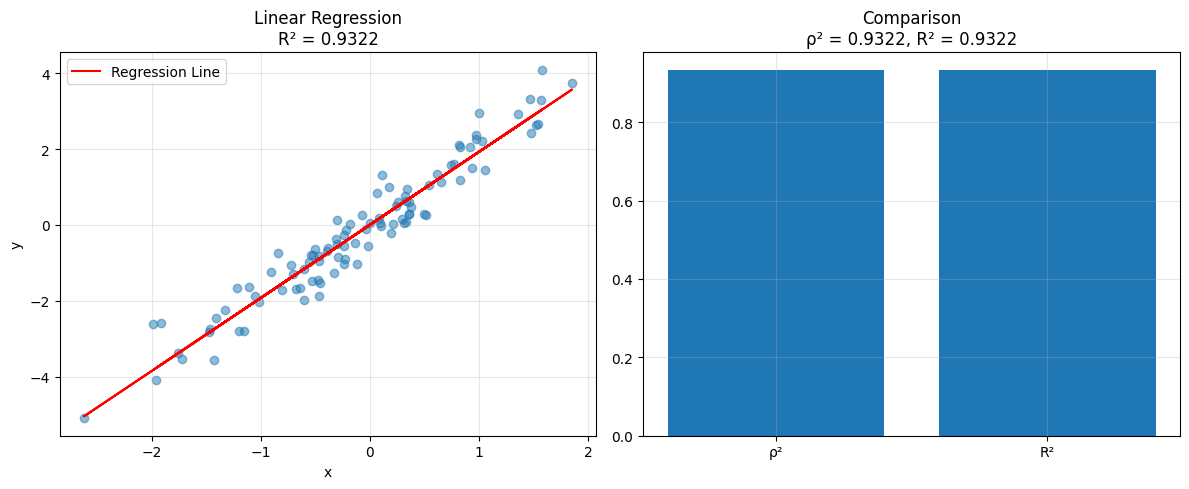

In [21]:
def demonstrate_relationship():
    # Generate some sample data to illustrate the relationship
    np.random.seed(42)
    x = np.random.normal(0, 1, 100)
    y = 2*x + np.random.normal(0, 0.5, 100)  # y with some noise

    # Calculate Pearson correlation
    rho = np.corrcoef(x, y)[0,1] #getting the correlation coefficient matrix and [0,1] is the relationship between x and y in np.corrcoef() metrix

    # Fit linear regression and get R² using sklearn and not like question 4
    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)

    # Plot
    plt.figure(figsize=(12, 5))

    # Scatter plot with regression line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, model.predict(X), 'r-', label='Regression Line')
    plt.title(f'Linear Regression\nR² = {r2:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Compare ρ² and R²
    plt.subplot(1, 2, 2)
    plt.bar(['ρ²', 'R²'], [rho**2, r2]) # in
    plt.title(f'Comparison\nρ² = {rho**2:.4f}, R² = {r2:.4f}')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

demonstrate_relationship()

<hr>
<hr>

## Math logic:
### 1. Show that $ \hat{\rho}^2 = R^2 $

**Proof:**

In simple linear regression, where $y$ is regressed on $ x $, the coefficient of determination $ R^2 $ quantifies the proportion of variance in $ y $ explained by $ x $. To establish that $ R^2 = \hat{\rho}^2 $, we proceed as follows:

**Definitions:**

- **Total Sum of Squares (TSS):**
  $
  \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2
  $
  
- **Residual Sum of Squares (RSS):**
  $
  \text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $
  
- **Coefficient of Determination:**
  $
  R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
  $
  
- **Pearson Correlation Coefficient:**
  $
  \hat{\rho} = \frac{x^\top y}{\|x\| \|y\|}
  $

**Assumption:**
Assume that both $ x $ and $ y $ are mean-centered, i.e., $ \bar{x} = 0 $ and $ \bar{y} = 0 $. This simplifies calculations but is not strictly required for the relationship of $ R^2 $ and $ \hat{\rho}^2 $.

**Estimation in Simple Linear Regression:**

The least squares estimate of the slope $ \hat{\beta} $ in regressing $ y $ on $ x $ is:
$
\hat{\beta} = \frac{x^\top y}{x^\top x}
$

The predicted values $ \hat{y} $ are:
$
\hat{y} = \hat{\beta} x = \left( \frac{x^\top y}{x^\top x} \right) x
$

**Calculating RSS:**
$
\text{RSS} = \| y - \hat{y} \|^2 = \left\| y - \left( \frac{x^\top y}{x^\top x} \right) x \right\|^2
$

$
\text{RSS} = \| y \|^2 - \frac{(x^\top y)^2}{x^\top x}
$

**Calculating $ R^2 $:**
$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} = 1 - \frac{\| y \|^2 - \frac{(x^\top y)^2}{x^\top x}}{\| y \|^2} = \frac{(x^\top y)^2}{x^\top x \| y \|^2}
$

**Expressing $ \hat{\rho}^2 $:**
$
\hat{\rho}^2 = \left( \frac{x^\top y}{\|x\| \|y\|} \right)^2 = \frac{(x^\top y)^2}{\|x\|^2 \|y\|^2} = \frac{(x^\top y)^2}{x^\top x \| y \|^2}
$

**Key Relationship:**

Using normalized vectors:
- Let $ \tilde{x} = \frac{x}{\|x\|} $ and $ \tilde{y} = \frac{y}{\|y\|} $. Then:
$
\hat{\rho} = \tilde{x}^\top \tilde{y}
$
- Therefore, $ \hat{\rho}^2 = (\tilde{x}^\top \tilde{y})^2 = R^2 $.

**Conclusion:**
$
R^2 = \hat{\rho}^2
$

Thus, the coefficient of determination $ R^2 $ is equal to the square of the Pearson correlation coefficient $ \hat{\rho} $ in simple linear regression.

---

### 2. Find Conditions on $ x $ and $ y $ Such That $ R^2 $ Is Maximal

Since $ R^2 = \hat{\rho}^2 $ and the Pearson correlation coefficient $ \hat{\rho} $ satisfies $ -1 \leq \hat{\rho} \leq 1 $, the maximum value of $ R^2 $ is 1. This maximum is achieved under the following conditions:

**Conditions for $ R^2 = 1 $:**

1. **Perfect Linear Relationship:**
   - There exist constants $ a $ and $ b $ such that:
  $$
  y_i = a x_i + b \quad \text{for all } i = 1, 2, \dots, n
  $$
   - **Positive Slope $( a > 0 )$:** $ \hat{\rho} = 1 $
   - **Negative Slope $( a < 0 )$:** $ \hat{\rho} = -1 $

2. **No Random Error:**
   - All data points lie exactly on the regression line.
   - Residuals $ y_i - \hat{y}_i = 0 $ for all $ i $.
   - Residual Sum of Squares $ \text{RSS} = 0 $.

**Explanation:**

- **Maximal Correlation:** When $ \hat{\rho} = \pm 1 $, the variables $ x $ and $ y $ are perfectly linearly related.
- **Implications for Regression:**
  - The regression model explains all the variability in $ y $ based on $ x $.
  - The coefficient of determination $ R^2 $ reaches its maximal value of 1.

_____________

### Conclusion

1. **Equality of $ R^2 $ and $ \hat{\rho}^2 $:**
   - In simple linear regression, the coefficient of determination $ R^2 $ is equal to the square of the Pearson correlation coefficient $ \hat{\rho} $.

2. **Conditions for Maximal $ R^2 $:**
   - $ R^2 $ attains its maximum value of 1 when there is a perfect linear relationship between $ x $ and $ y $, meaning all data points lie exactly on a straight line with no residual error.

This relationship underscores the strong connection between correlation and the goodness-of-fit measure in linear regression, highlighting that the Pearson correlation coefficient effectively quantifies the proportion of variance in the dependent variable explained by the independent variable.